# $\ell_p$ Balls

In the previous section, we introduced norms as a way to measure the 'size' of a vector.
Here, we will see that norms give us a natural way to define an important type of set, namely balls associated with those norms.
These balls generalize circles and spheres (which are the balls associated with the Euclidean norm in $\mathbb{R}^{2}$ and $\mathbb{R}^{3}$, respectively.
They can be used to understand the hard-to-visualize $\mathbb{R}^{n}$.

Before we continue, recall the definition of the $p$-norms and the $\infty$-norm.
For a vector $\boldsymbol{x} = (x_1,\dots,x_n) \in \mathbb{R}^n$ and number $p\geq 1$, the $p$-norm is given by


$$
\|\boldsymbol{x}\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p} ,
$$

and the $\infty$-norm is given by

$$
\|\boldsymbol{x}\|_\infty = \max_{i=1,\dots, n}|x_i| .
$$

For any given $p$-norm, for $p \in [1,\infty]$, there is a special set called the _unit $p$-ball_, which is defined as

$$
\mathcal{B}_p = \{x\in\mathbb{R}^n \mid \|\boldsymbol{x}\|_p \leq 1\}
$$

This set contains all vectors $\boldsymbol{x}\in \mathbb{R}^n$ whose $p$-norm is at most $1$.
The term 'ball' is used to describe this object because of intuition coming from the Euclidean norm / $2$-norm.
This will become more clear in the next section.


## The Euclidean ball

A special case of the unit $p$-balls is the Euclidean unit ball, which is given by the set

$$
\mathcal{B}_2 = \{x\in\mathbb{R}^n\mid \|\boldsymbol{x}\|_2 \leq 1\} .
$$

To get some intuition, let's focus on the 2-dimensional case -- i.e., when $n=2$.
Then, the unit ball is the set of all points $\boldsymbol{x} = (x_1,x_2)$ such that $\sqrt{x_1^2 + x_2^2} \leq 1$, or equivalently, the set of all points such that $x_1^2 + x_2^2 \leq 1$.
From basic geometry, we know that the equation $x_1^2 + x_2^2 = 1$ defines a circle of radius 1 in the plane.
Hence, the set of points satisfying $x_1^2 + x_2^2 \leq 1$ includes all points on or inside of this circle.

To visualize the unit balls in this section, below we define the function `points_in_unit_ball()`, which generates points uniformly at random from the unit $p$-balls using the following method: first, we draw a point $\boldsymbol{x}$ at random from the set $[-1,1]\times[-1,1]$ (which we note is exactly equal to the infinity ball $\mathcal{B}_\infty$), and then store the point if $\|\boldsymbol{x}\|_p\leq 1$, and ignore it otherwise.
We repeat this for $5000$ points. However, you can also try varying the number of points yourself by changing the value of `n_samples`.

In [1]:
import numpy as np

def points_in_unit_ball(p, n_samples=5000):
    # generate samples uniformly from [-1,1] x [-1,1]
    x = np.random.uniform(low=-1., high=1., size = (n_samples, 2))

    # calculate the p-norm of each row of x
    norms = np.linalg.norm(x, ord=p, axis=1)

    # select the rows of x whose p-norm is at most 1
    valid_x = x[norms <= 1]
    return valid_x

Now we can use this to verify that the set $\mathcal{B}_2$ is indeed a circle:

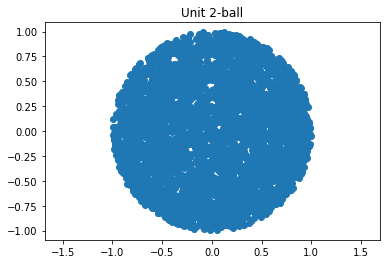

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

samples = points_in_unit_ball(p=2)
plt.scatter(samples[:,0], samples[:,1])
plt.title('Unit 2-ball')
plt.axis('equal')
plt.show()

As expected, we see that this gives us a circle of radius of radius $1$.


## Visualizing the $1$-ball and $\infty$-ball

While the unit ball for the $2$-norm was in fact a 'round' ball shape, this is not the case for other norms.
Before plotting them, however, let's try to figure out what the shape of the $\infty$ and $1$ norm balls should be.

Let's start with the $\infty$-norm ball.
Take a point $x\in [-1,1]\times [-1,1]$.
What is the largest that its $\infty$-norm could be?
We have $\|\boldsymbol{x}\|_\infty = \max(|x_1|, |x_2|)$, but since $x_1 \in [-1,1]$ and $x_2\in [-1,1]$, we have that $|x_1|$ and $|x_2|$ are both at most $1$, hence $\|\boldsymbol{x}\|_\infty \leq 1$.
On the other hand, if $x$ is outside of the set $[-1,1]\times [-1,1]$, then at least one of its components is larger than $1$ in absolute value, and so its $\infty$-norm must be greater than one.
Therefore we guess that the unit $\infty$-ball must just be the entire box $[-1,1]\times[-1,1]$.

Let's test this out using the our function from above function.

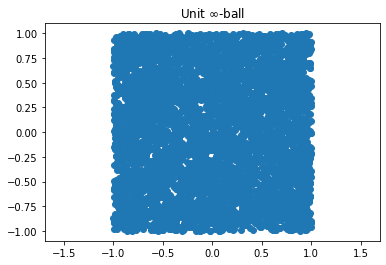

In [3]:
samples = points_in_unit_ball(p=np.inf)
plt.scatter(samples[:,0], samples[:,1])
plt.title(r'Unit $\infty$-ball')
plt.axis('equal')
plt.show()

As expected, we get a box (with sides parallel to the canonical axes)!

Now let's move on to the $1$-norm.
Let's consider the points along the boundary of the $1$-norm ball, which are the points satisfying  $|x_1|+|x_2| = 1$.
When $x_1, x_2\geq 0$, this just gives us the equation of a line with slope $-1$ and intercept $1$: $x_2 = 1-x_1$.
When $x_2\geq 0$ and $x_1<0$, then this equation gives us a line with slope $1$ and intercept $1$: $x_2 = 1+x_1$.
When $x_2<0$ and $x_1<0$, then we get a line with slope $-1$ and intercept $-1$: $x_2 = -1 - x_1$, and finally what $x_2<0$ and $x_1\geq 0$, we get a line with slope $1$ and intercept $-1$: $x_2 = -1+x_1$.
If we put these four lines together, we should get the shape of a diamond.

Let's verify this as well.

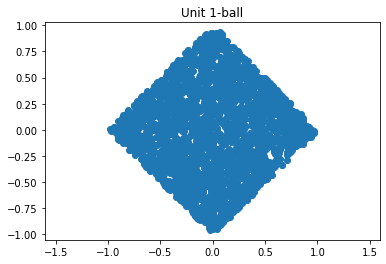

In [4]:
samples = points_in_unit_ball(p=1)
plt.scatter(samples[:,0], samples[:,1])
plt.title('Unit 1-ball')
plt.axis('equal')
plt.show()

## Comparing unit balls of different norms

In the last section in the workbook, we saw that the $p$-norms are ordered, meaning that if $1\leq p<q\leq \infty$, then for any vector $x$

$$
\|\boldsymbol{x}\|_q \leq \|\boldsymbol{x}\|_p  .
$$

What does this mean in terms of the sizes of the different unit balls?
Intuitively, if the norm $\|\cdot\|_q$ gives _smaller_ values than $\|\cdot\|_p$, then _more_ vectors will have norm $\leq 1$ with respect to the $q$-ball than the $p$-ball.
Hence, because of the above inequality, we expect the unit balls to get bigger as $p$ grows. Let's plot some of the unit balls together to verify this visually.

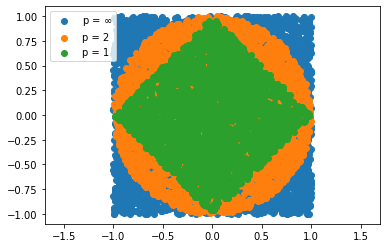

In [5]:
for p in [np.inf, 2, 1]:
  samples = points_in_unit_ball(p=p)
  label = 'p = %s' % p if p in [1,2] else r'p = $\infty$' #nice formatted labels
  plt.scatter(samples[:,0], samples[:,1], label=label)

plt.legend()
plt.axis('equal')
plt.show()

Indeed, the $\infty$-norm ball is the largest of all the unit balls, and the $1$-ball is the smallest.
A natural way to measure the size of the unit balls (at least in $\mathbb{R}^2$) is to measure their area (or volume, for $\mathbb{R}^{n}$, for $n \ge 3$).
For example, the $\infty$-ball is just the entire set $[-1,1]\times[-1,1]$, which is a box with area $4$, and the $2$-ball is a circle with radius $1$, which has area $\pi$.

We include a function below which lets us estimate the area of any $p$-ball.

In [6]:
def unit_ball_volume(p, n_samples=10000):
    x = np.random.uniform(low=-1., high=1., size = (n_samples, 2))
    norms = np.linalg.norm(x, ord=p, axis=1)
    vol = 4*np.mean(norms <= 1)
    return vol

The function `unit_ball_volume(p)` works in the following way: similar to how we plotted the unit balls, we sample `n_samples` (defaulting to 10,000) points at random from the set $[-1,1]\times[-1,1]$ and measure the fraction of points that satisfy $\|\boldsymbol{x}\|_p\leq 1$.
We then multiply the result by $4$ (the area of the box $[-1,1]\times[-1,1]$), and this gives us a pretty good estimate of the area of unit $p$-ball!
Let's check this with the $2$-ball, and see if it gives us a good approximation to $\pi$:

In [7]:
unit_ball_volume(p=2)

3.1292

This will give us a different result every time due to random sampling, but it should be a pretty good estimate. We can make the approximation better by increasing the value of `n_samples`.

We can do a similar check with the $1$-ball.
This area can be computed by recognizing that the diamond shape is made up of 4 right triangles, each with area $1/2$, and so the area of the unit $1$-ball should be $2$.
Let's check that our function gives us a reasonably accurate estimate:

In [8]:
unit_ball_volume(p=1)

2.0408

Note that this function just computes things in $\mathbb{R}^2$, but in principal we could apply the same method to estimate the _volumes_ of the $p$-balls in any dimension -- though the computation would in general be much slower.

Now we can use this function to see how the area of the unit balls in 2 dimensions grows with $p$:

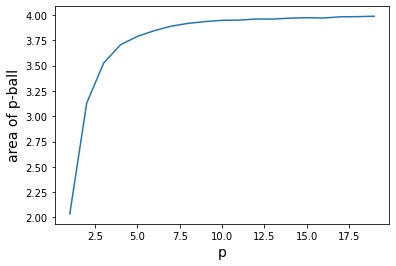

In [9]:
p_range = np.arange(1, 20, 1)
areas = [unit_ball_volume(p) for p in p_range]

plt.plot(p_range, areas)
plt.xlabel('p', fontsize=14)
plt.ylabel('area of p-ball', fontsize=14)
plt.show()

As expected, this is a nice increasing curve which starts at $2$ (the area of the 1-ball) and increases to very close to $4$ (the area of the $\infty$-ball).